In [67]:
import sys, os

# make sure the 'code' dir is on your path (change this):
codepath = '/user_data/mmhender/image_stats_gabor/code/'
sys.path.insert(0,codepath)

import numpy as np

from model_fitting import initialize_fitting 
from analyze_fits import analyze_gabor_params
from utils import default_paths

from analyze_features import load_feature_stats

import matplotlib.pyplot as plt
from matplotlib import cm

from plotting import load_fits, plot_utils

In [68]:
# Load everything

models = initialize_fitting.get_prf_models(which_grid=5)
n_prfs = len(models)
feature_type='gabor_solo'
which_prf_grid=5
# subjects=[1]
subjects = np.arange(1,9)
# trial_subset_list=['balance_indoor_outdoor','outdoor_only', 'indoor_only']
trial_subset_list=['balance_indoor_outdoor','outdoor_only', 'indoor_only',\
                   'balance_animacy', 'animate_only', 'inanimate_only', \
                   'balance_real_world_size_binary', 'large_only', 'small_only']
path_to_load = os.path.join(default_paths.gabor_texture_feat_path, 'feature_stats')

n_trial_subsets = len(trial_subset_list)
n_partitions = 3;
n_features = 96;
n_subjects=len(subjects)
meanvals = np.zeros((n_subjects, n_trial_subsets, n_features, n_prfs, n_partitions))
varvals = np.zeros((n_subjects, n_trial_subsets, n_features, n_prfs, n_partitions))

for si, ss in enumerate(subjects):
    for ti, trial_subset in enumerate(trial_subset_list):
        fn2load = os.path.join(path_to_load, 'S%s_%s_mean_grid%d_%s.npy'\
                                     %(ss, feature_type, which_prf_grid, trial_subset))
        mean = np.load(fn2load)

        meanvals[si,ti,:,:,:] = mean
        
        fn2load = os.path.join(path_to_load, 'S%s_%s_var_grid%d_%s.npy'\
                                     %(ss, feature_type, which_prf_grid, trial_subset))
        var = np.load(fn2load)

        varvals[si,ti,:,:,:] = var

In [69]:
feature_type='gabor_solo'
subject=999
mean_all, var_all, covar_all = \
        load_feature_stats.load_feature_stats(feature_type, subject=subject)


In [70]:
mean_all.shape

(96, 1456)

In [71]:
meanvals.shape

(8, 9, 96, 1456, 3)

In [72]:
# Gather information about the gabor feature channels
sf_unique, ori_unique = analyze_gabor_params.get_gabor_feature_info(n_ori=12, n_sf=8)
n_sf = len(sf_unique)
n_ori = len(ori_unique)

partition_names = ['trn','val','out']
 

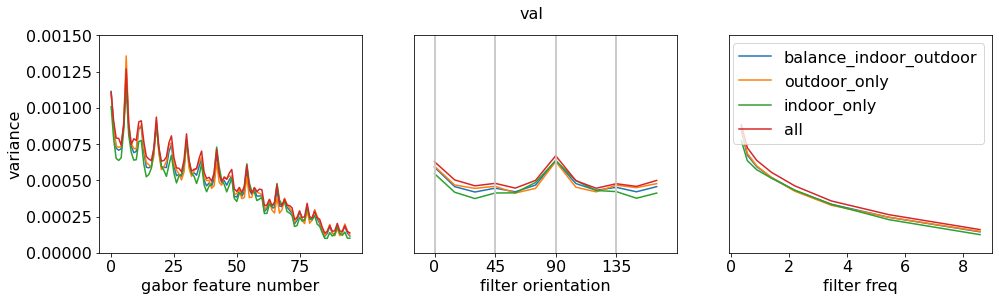

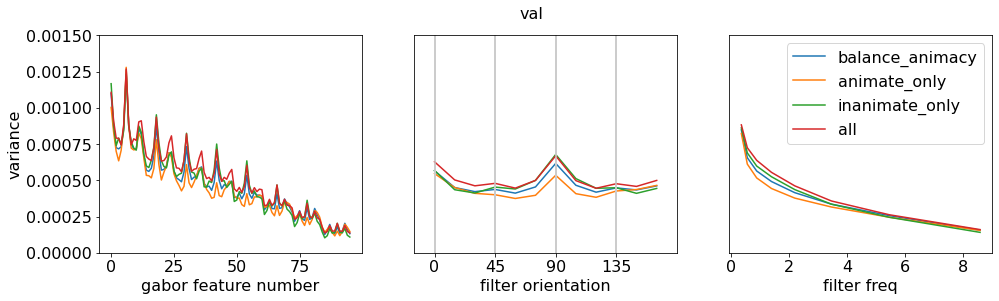

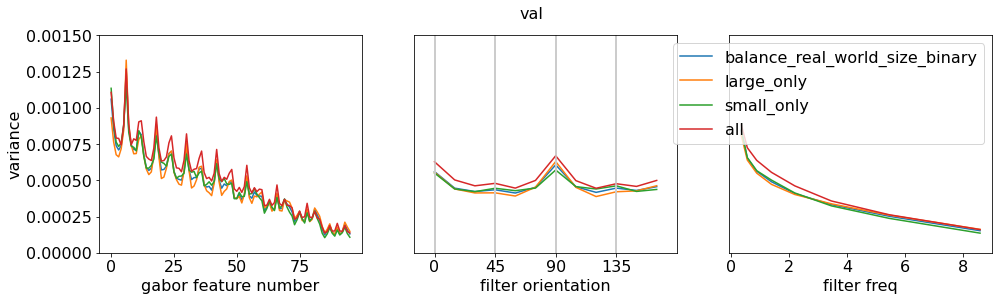

In [73]:
varlims = [0, 0.0015]

groups = [[0,1,2,9],[3,4,5,9],[6,7,8,9]]

for pi in [1]:
# for pi in [0,1,2]:

    for group in groups:

        names = [trial_subset_list[gg] for gg in group[0:3]]
        names += ['all']
        
        plt.figure(figsize=(16,4));

        for ti in group:

            if ti==9:
                var = var_all
            else:
                var = np.mean(varvals[:,ti,:,:,pi], axis=0)
            var_reshaped = np.reshape(var, [n_ori, n_sf, n_prfs], order = 'F')

            plt.subplot(1,3,1)
            plt.plot(np.mean(var, axis=1)[0:150])
            plt.xlabel('gabor feature number');
            plt.ylabel('variance');
            plt.ylim(varlims)

            plt.subplot(1,3,2)
            plt.plot(ori_unique, np.mean(np.mean(var_reshaped, axis=2), axis=1))
            plt.xlabel('filter orientation');
            # plt.ylabel('var');
            plt.yticks([])
            plt.xlim([-15, 180])
            for ii in np.arange(0,180,45):
                plt.axvline(ii, color=[0.8, 0.8, 0.8])
            plt.ylim(varlims)
            plt.xticks(np.arange(0,180,45))

            plt.subplot(1,3,3)
            plt.plot(sf_unique, np.mean(np.mean(var_reshaped, axis=2), axis=0))
            plt.xlabel('filter freq');
            # plt.ylabel('var');
            plt.yticks([])
            plt.ylim(varlims)

        plt.subplot(1,3,3)
        plt.legend(names)
            
        plt.suptitle(partition_names[pi])
    

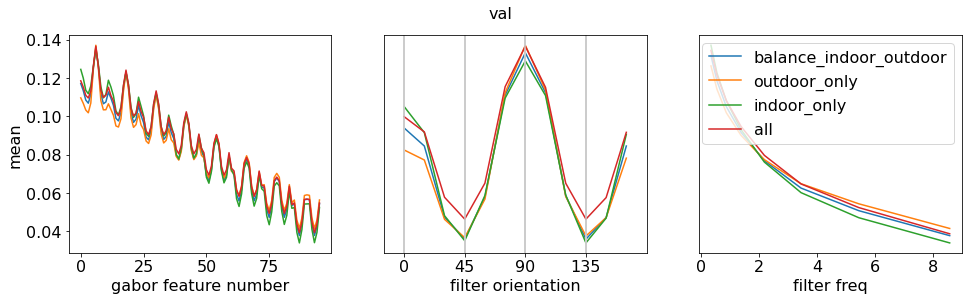

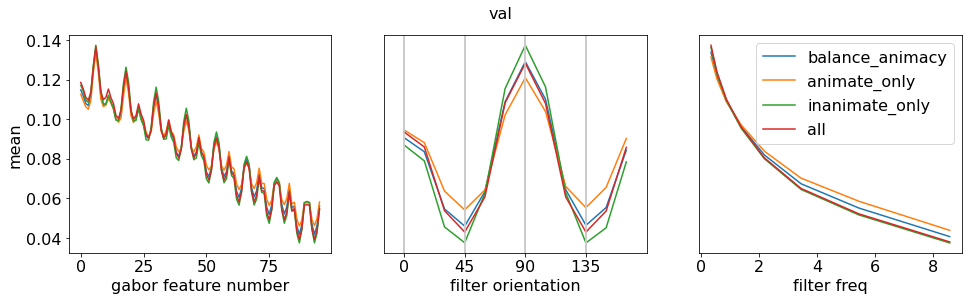

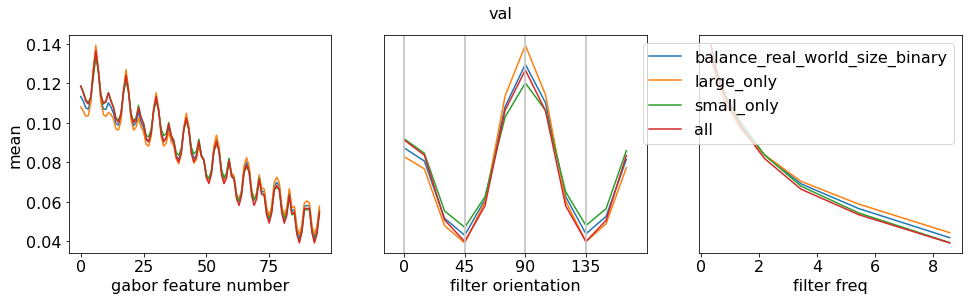

In [66]:
lims = [0, 0.14]

groups = [[0,1,2,9],[3,4,5,9],[6,7,8,9]]

for pi in [1]:
# for pi in [0,1,2]:

    for group in groups:

        names = [trial_subset_list[gg] for gg in group[0:3]]
        names += ['all']
        
        plt.figure(figsize=(16,4));

        for ti in group:

            if ti==9:
                mean = mean_all
            else:
                mean = np.mean(meanvals[:,ti,:,:,pi], axis=0)
            mean_reshaped = np.reshape(mean, [n_ori, n_sf, n_prfs], order = 'F')

            plt.subplot(1,3,1)
            plt.plot(np.mean(mean, axis=1)[0:150])
            plt.xlabel('gabor feature number');
            plt.ylabel('mean');
            # plt.ylim(lims)

            plt.subplot(1,3,2)
            plt.plot(ori_unique, np.mean(np.mean(mean_reshaped, axis=2), axis=1))
            plt.xlabel('filter orientation');
            # plt.ylabel('var');
            plt.yticks([])
            plt.xlim([-15, 180])
            for ii in np.arange(0,180,45):
                plt.axvline(ii, color=[0.8, 0.8, 0.8])
            # plt.ylim(lims)
            plt.xticks(np.arange(0,180,45))

            plt.subplot(1,3,3)
            plt.plot(sf_unique, np.mean(np.mean(mean_reshaped, axis=2), axis=0))
            plt.xlabel('filter freq');
            # plt.ylabel('var');
            plt.yticks([])
            # plt.ylim(lims)

        plt.subplot(1,3,3)
        plt.legend(names)
            
        plt.suptitle(partition_names[pi])
    

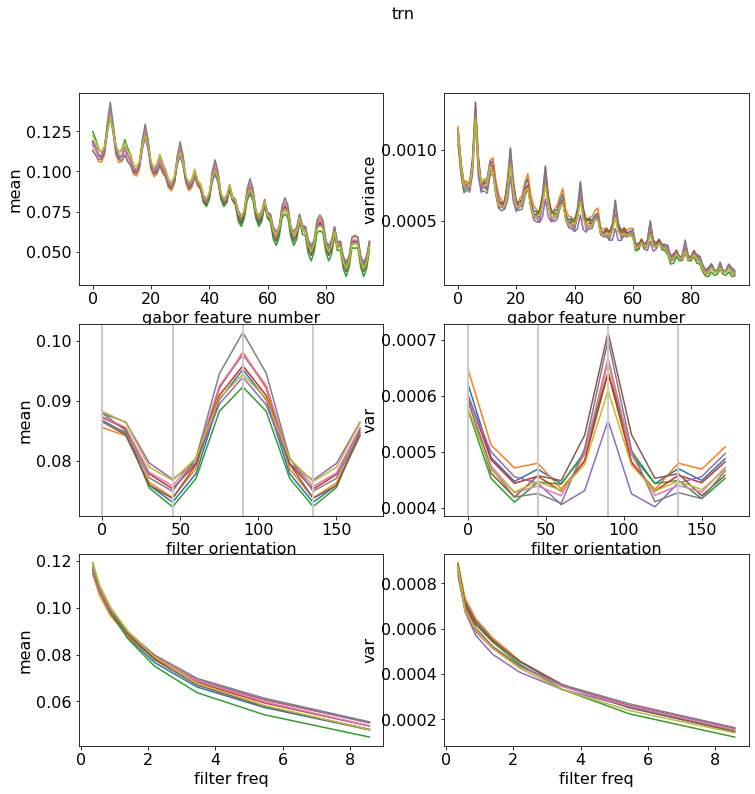

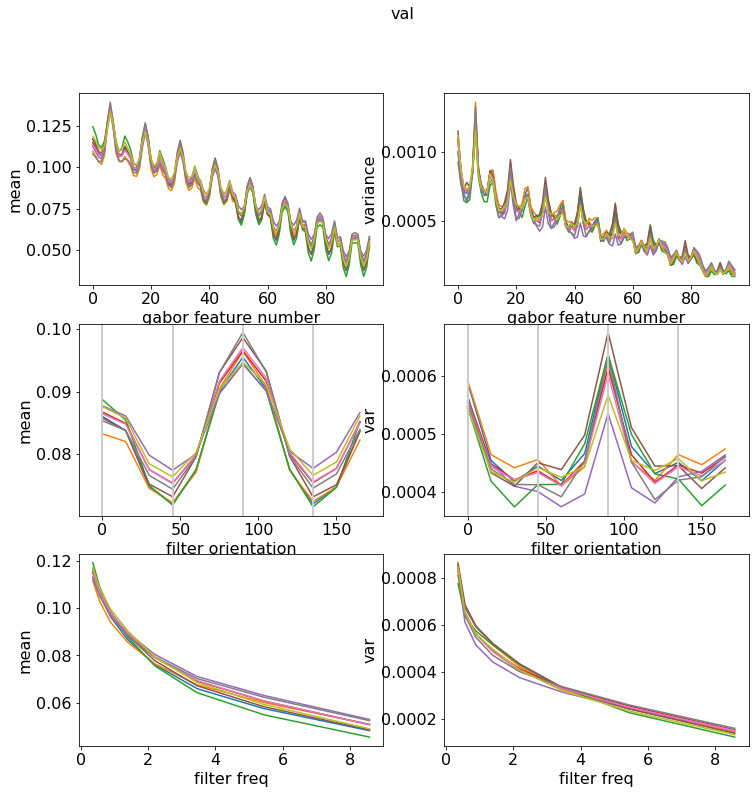

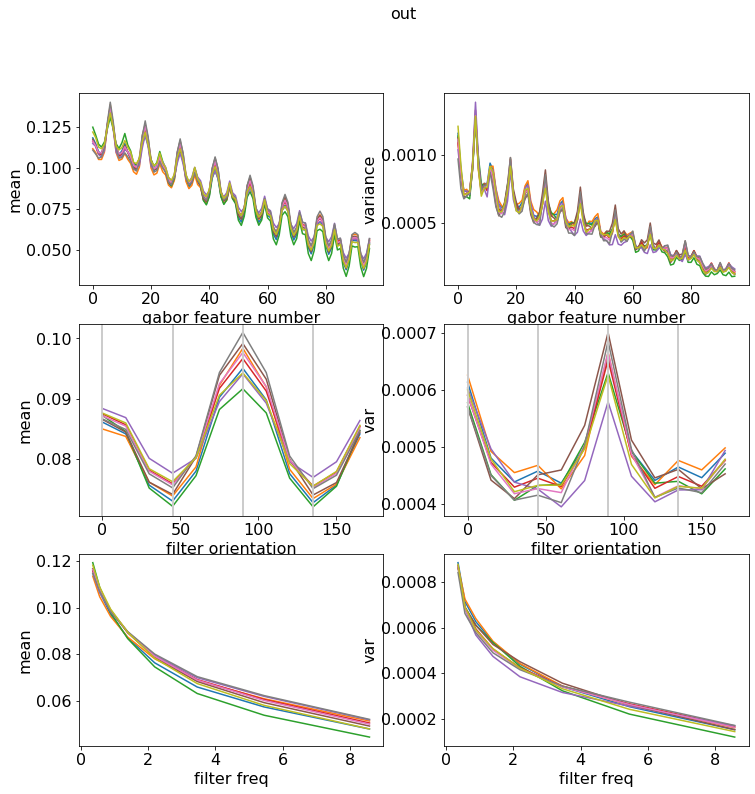

In [48]:

for pi in [0,1,2]:

    plt.figure(figsize=(12,12));

    for ti in range(n_trial_subsets):

        mean = np.mean(meanvals[:,ti,:,:,pi], axis=0)
        var = np.mean(varvals[:,ti,:,:,pi], axis=0)
        mean_reshaped = np.reshape(mean, [n_ori, n_sf, n_prfs], order = 'F')
        var_reshaped = np.reshape(var, [n_ori, n_sf, n_prfs], order = 'F')

        plt.subplot(3,2,1)
        plt.plot(np.mean(mean, axis=1)[0:150])
        plt.xlabel('gabor feature number');
        plt.ylabel('mean');
        plt.subplot(3,2,2)
        plt.plot(np.mean(var, axis=1)[0:150])
        plt.xlabel('gabor feature number');
        plt.ylabel('variance');

        plt.subplot(3,2,3)
        plt.plot(ori_unique, np.mean(np.mean(mean_reshaped, axis=2), axis=1))
        plt.xlabel('filter orientation');
        plt.ylabel('mean');
        plt.xlim([-15, 180])
        for ii in np.arange(0,180,45):
            plt.axvline(ii, color=[0.8, 0.8, 0.8])

        plt.subplot(3,2,4)
        plt.plot(ori_unique, np.mean(np.mean(var_reshaped, axis=2), axis=1))
        plt.xlabel('filter orientation');
        plt.ylabel('var');
        plt.xlim([-15, 180])
        for ii in np.arange(0,180,45):
            plt.axvline(ii, color=[0.8, 0.8, 0.8])

        plt.subplot(3,2,5)
        plt.plot(sf_unique, np.mean(np.mean(mean_reshaped, axis=2), axis=0))
        plt.xlabel('filter freq');
        plt.ylabel('mean');

        plt.subplot(3,2,6)
        plt.plot(sf_unique, np.mean(np.mean(var_reshaped, axis=2), axis=0))
        plt.xlabel('filter freq');
        plt.ylabel('var');
        
    plt.suptitle(partition_names[pi])
    

In [41]:
mean.shape

(96, 1456, 3)

#### Plot mean/variance each feature channel
Averaged across pRFs

0.03920804 0.13662134
0.00013643742 0.0012682579


Text(0.5, 1.0, 'var')

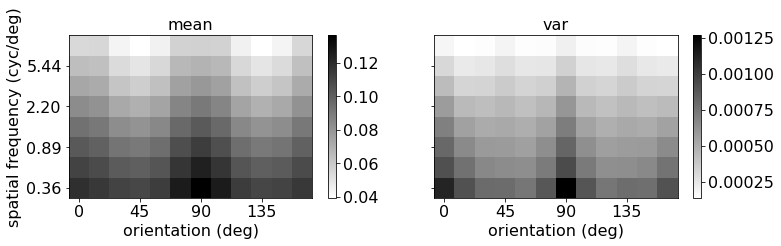

In [21]:
plt.figure(figsize=(12,3));

plt.subplot(1,2,1)

image = np.mean(mean_reshaped, axis=2)
print(np.min(image), np.max(image))
clims = [np.min(image), np.max(image)]
plt.pcolormesh(image.T, vmin=clims[0], vmax=clims[1], cmap=cm.gray_r)
plt.colorbar()
plt.xticks(np.arange(0,12,3)+0.5, np.arange(0,180,45))
sf_ticks = sf_unique[[0,2,4,6]].round(2)

plt.yticks(np.array([0,2,4,6])+0.5, ['%.2f'%sf for sf in sf_ticks])
plt.ylabel('spatial frequency (cyc/deg)')

plt.axis('square')
plt.xlim([0,12])
plt.ylim([0,8])
plt.xlabel('orientation (deg)')
plt.title('mean')

plt.subplot(1,2,2)

image = np.mean(var_reshaped, axis=2)
print(np.min(image), np.max(image))
clims = [np.min(image), np.max(image)]
plt.pcolormesh(image.T, vmin=clims[0], vmax=clims[1], cmap=cm.gray_r)

plt.colorbar()
plt.xticks(np.arange(0,12,3)+0.5, np.arange(0,180,45))
sf_ticks = sf_unique[[0,2,4,6]].round(2)
plt.yticks(np.array([0,2,4,6])+0.5, [])

plt.axis('square')
plt.xlim([0,12])
plt.ylim([0,8])

plt.xlabel('orientation (deg)')

plt.title('var')
    